In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define site pairs
site_pairs = [
    'heart_wrist', 
    'heart_neck', 
    'wrist_neck', 
    'head_heart', 
    'head_wrist', 
    'head_neck'
]

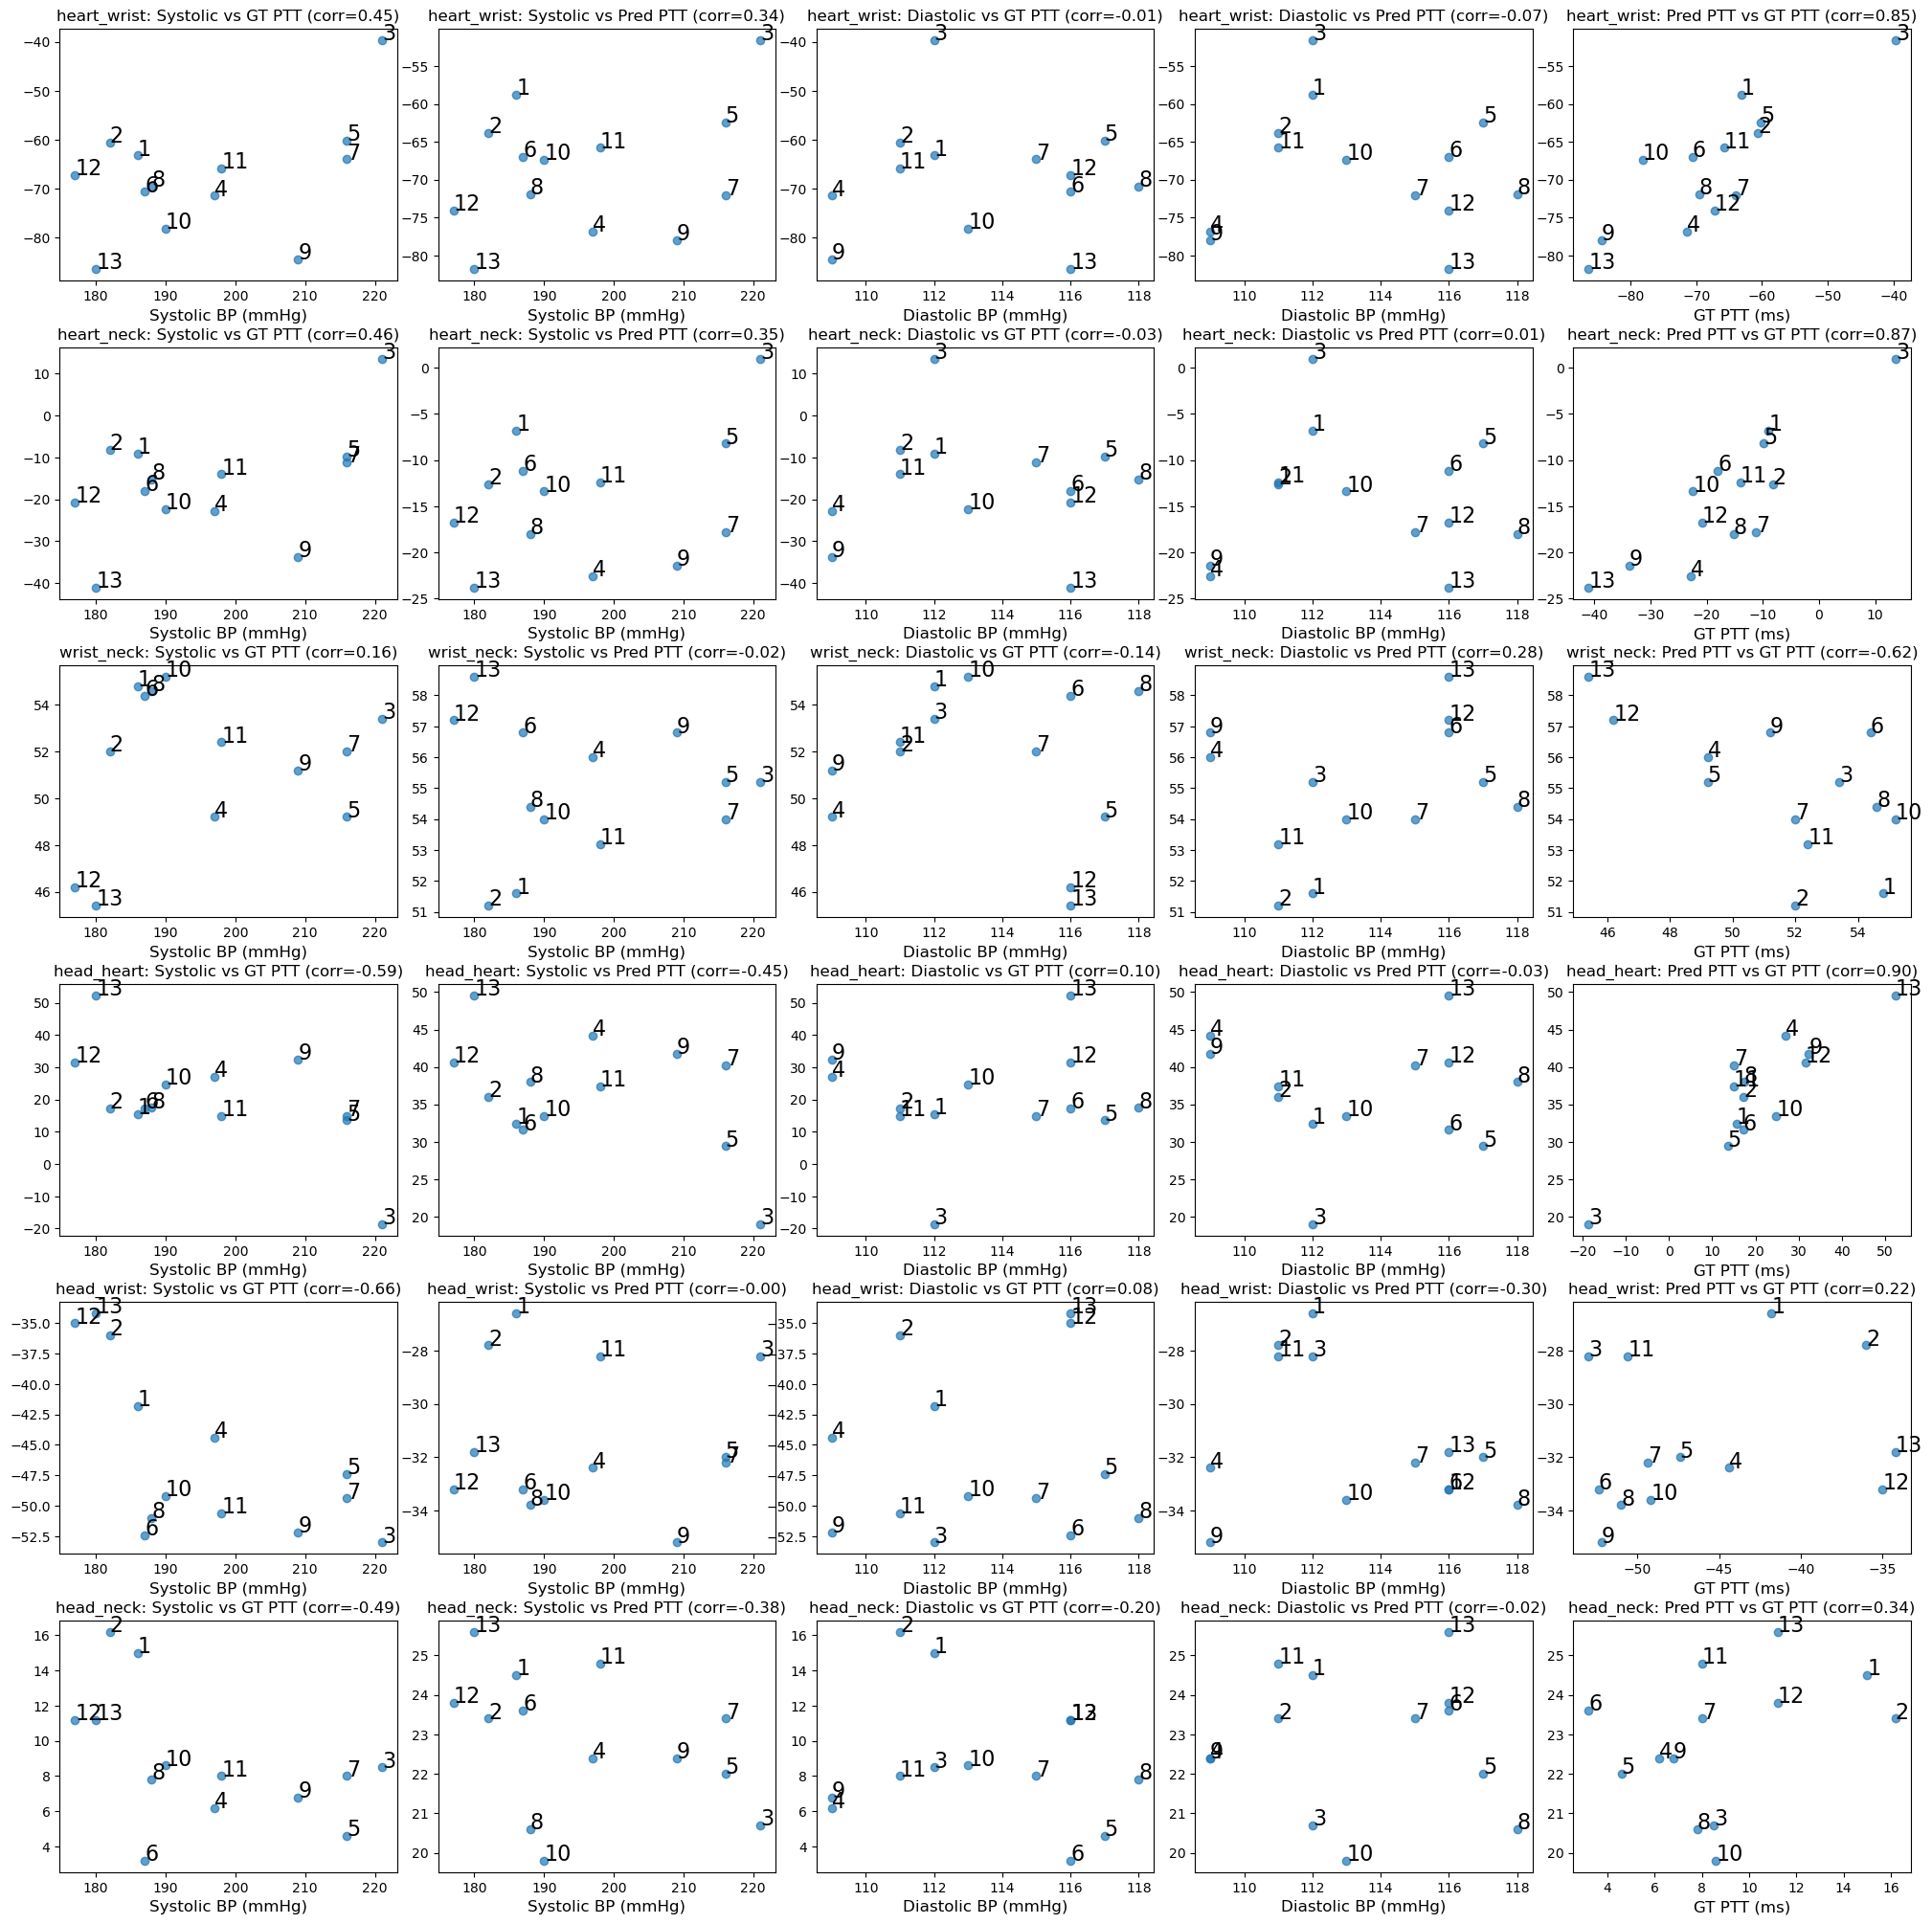

In [3]:
# Read the CSV file
df = pd.read_csv('results/bp_eval/fusion_v3/david_ptt_bp_data.csv')
# df = pd.read_csv('results/bp_eval/fusion_v1/bill_ptt_bp_data.csv')

# Add order numbers
df['order'] = range(1, len(df) + 1)
# Create a figure with subplots for each site pair
num_pairs = len(site_pairs)
fig, axes = plt.subplots(num_pairs, 5, figsize=(20, 5*num_pairs*2/3))
plt.rcParams.update({'font.size': 14})  # Increase base font size

for i, site_pair in enumerate(site_pairs):
    # Get PTT column names
    gt_col = f'ptt_{site_pair}_gt'
    pred_col = f'ptt_{site_pair}_pred'
    gt_ptt = df[gt_col]
    pred_ptt = df[pred_col] 
    # Calculate correlations
    sys_gt_corr = np.corrcoef(df['sys'], gt_ptt)[0,1]
    sys_pred_corr = np.corrcoef(df['sys'], pred_ptt)[0,1]
    dia_gt_corr = np.corrcoef(df['dia'], gt_ptt)[0,1]
    dia_pred_corr = np.corrcoef(df['dia'], pred_ptt)[0,1]
    
    # Plot systolic vs ground truth
    axes[i,0].scatter(df['sys'], gt_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,0].annotate(txt, (df['sys'].iloc[j], gt_ptt.iloc[j]), fontsize=16)
    axes[i,0].set_title(f'{site_pair}: Systolic vs GT PTT (corr={sys_gt_corr:.2f})', fontsize=12)
    axes[i,0].set_xlabel('Systolic BP (mmHg)', fontsize=12)
    # axes[i,0].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,0].tick_params(axis='both', labelsize=10)

    # Plot systolic vs predicted
    axes[i,1].scatter(df['sys'], pred_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,1].annotate(txt, (df['sys'].iloc[j], pred_ptt.iloc[j]), fontsize=16)
    axes[i,1].set_title(f'{site_pair}: Systolic vs Pred PTT (corr={sys_pred_corr:.2f})', fontsize=12)
    axes[i,1].set_xlabel('Systolic BP (mmHg)', fontsize=12)
    # axes[i,1].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,1].tick_params(axis='both', labelsize=10)

    # Plot diastolic vs ground truth
    axes[i,2].scatter(df['dia'], gt_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,2].annotate(txt, (df['dia'].iloc[j], gt_ptt.iloc[j]), fontsize=16)
    axes[i,2].set_title(f'{site_pair}: Diastolic vs GT PTT (corr={dia_gt_corr:.2f})', fontsize=12)
    axes[i,2].set_xlabel('Diastolic BP (mmHg)', fontsize=12)
    # axes[i,2].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,2].tick_params(axis='both', labelsize=10)

    # Plot diastolic vs predicted
    axes[i,3].scatter(df['dia'], pred_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,3].annotate(txt, (df['dia'].iloc[j], pred_ptt.iloc[j]), fontsize=16)
    axes[i,3].set_title(f'{site_pair}: Diastolic vs Pred PTT (corr={dia_pred_corr:.2f})', fontsize=12)
    axes[i,3].set_xlabel('Diastolic BP (mmHg)', fontsize=12)
    # axes[i,3].set_ylabel('PTT (ms)', fontsize=12)
    axes[i,3].tick_params(axis='both', labelsize=10)

    axes[i,4].scatter(gt_ptt, pred_ptt, alpha=0.7)
    for j, txt in enumerate(df['order']):
        axes[i,4].annotate(txt, (gt_ptt.iloc[j], pred_ptt.iloc[j]), fontsize=16)
    axes[i,4].set_title(f'{site_pair}: Pred PTT vs GT PTT (corr={np.corrcoef(pred_ptt, gt_ptt)[0,1]:.2f})', fontsize=12)
    axes[i,4].set_xlabel('GT PTT (ms)', fontsize=12)
    # axes[i,4].set_ylabel('Pred PTT (ms)', fontsize=12)
    axes[i,4].tick_params(axis='both', labelsize=10)
    
plt.tight_layout(pad=0.25, h_pad=0.25, w_pad=0)
plt.show()

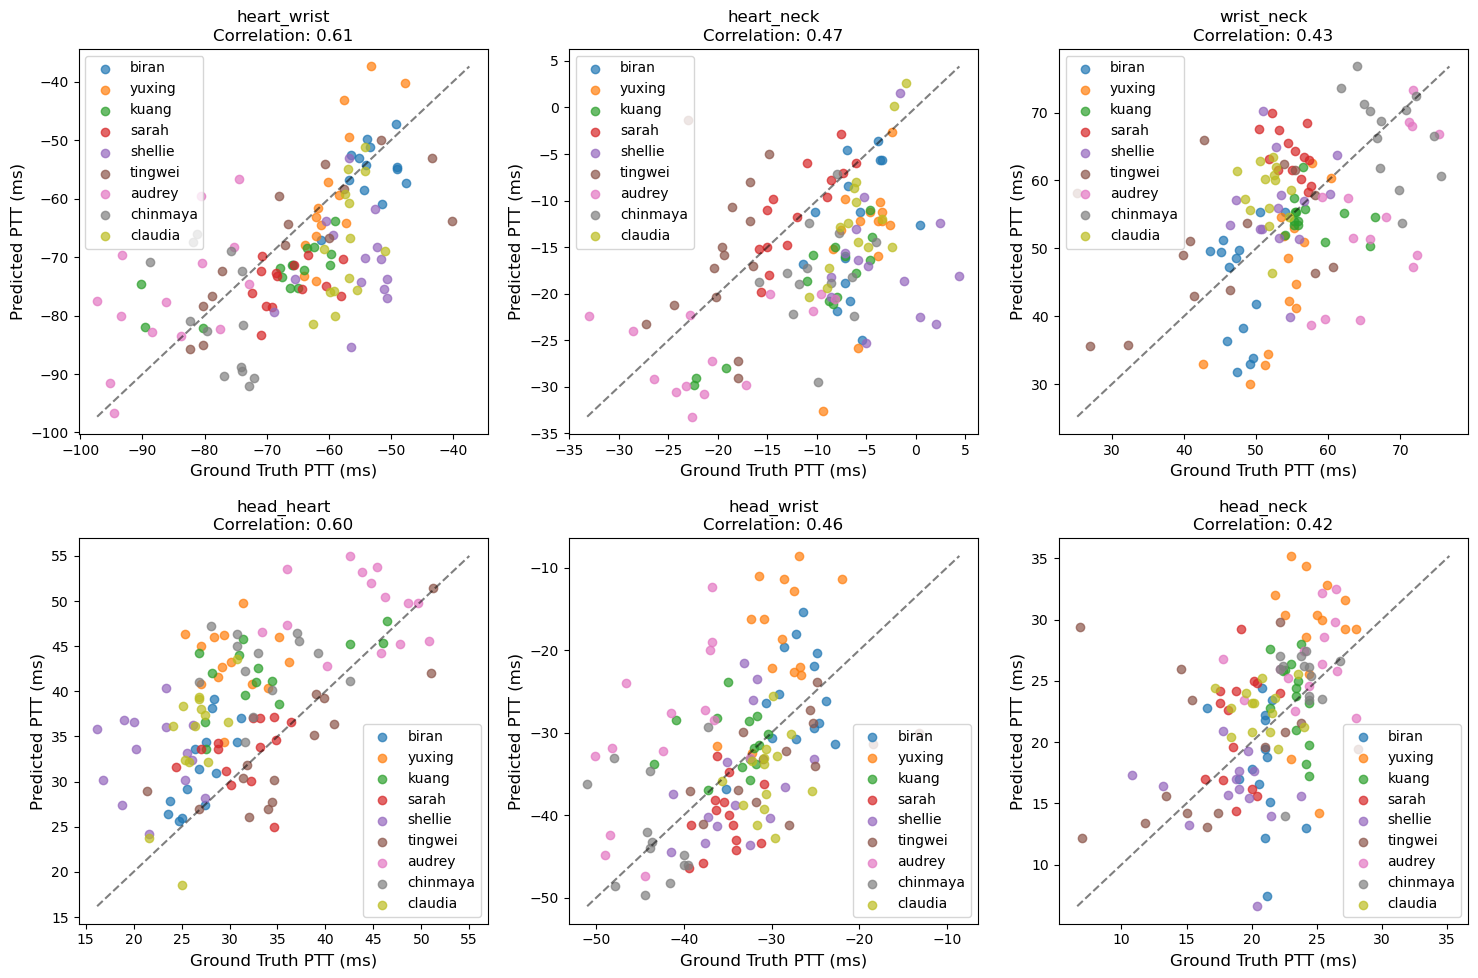

In [ ]:
import os
# Create a figure with subplots for each site pair
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
plt.rcParams.update({'font.size': 14})
path = 'results/bp_eval/fusion_v3/'
# filelist = os.listdir(path)
userlist = ['biran', 'yuxing', 'kuang', 'sarah', 'shellie', 'tingwei', 'audrey', 'chinmaya', 'claudia', 'hongyang', 'david', 'sean']
filelist = [f'{user}_ptt_bp_data.csv' for user in userlist]
for i, site_pair in enumerate(site_pairs):
    for file in filelist:
        # Read data for each user
        df = pd.read_csv(f'results/bp_eval/fusion_v3/{file}')
        
        # Get PTT column names
        gt_col = f'ptt_{site_pair}_gt'
        pred_col = f'ptt_{site_pair}_pred'
        
        # Plot scatter for this user
        axes[i].scatter(df[gt_col], df[pred_col], alpha=0.7, label=file.split('_')[0])
    
    # Calculate correlation using all data points
    all_data = pd.concat([pd.read_csv(f'results/bp_eval/fusion_v3/{file}') for file in filelist])
    corr = np.corrcoef(all_data[gt_col], all_data[pred_col])[0,1]
    
    axes[i].set_title(f'{site_pair}\nCorrelation: {corr:.2f}', fontsize=12)
    axes[i].set_xlabel('Ground Truth PTT (ms)', fontsize=12)
    axes[i].set_ylabel('Predicted PTT (ms)', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].legend(fontsize=10)
    
    # Add diagonal line
    min_val = min(all_data[gt_col].min(), all_data[pred_col].min())
    max_val = max(all_data[gt_col].max(), all_data[pred_col].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)

plt.tight_layout()
plt.show()



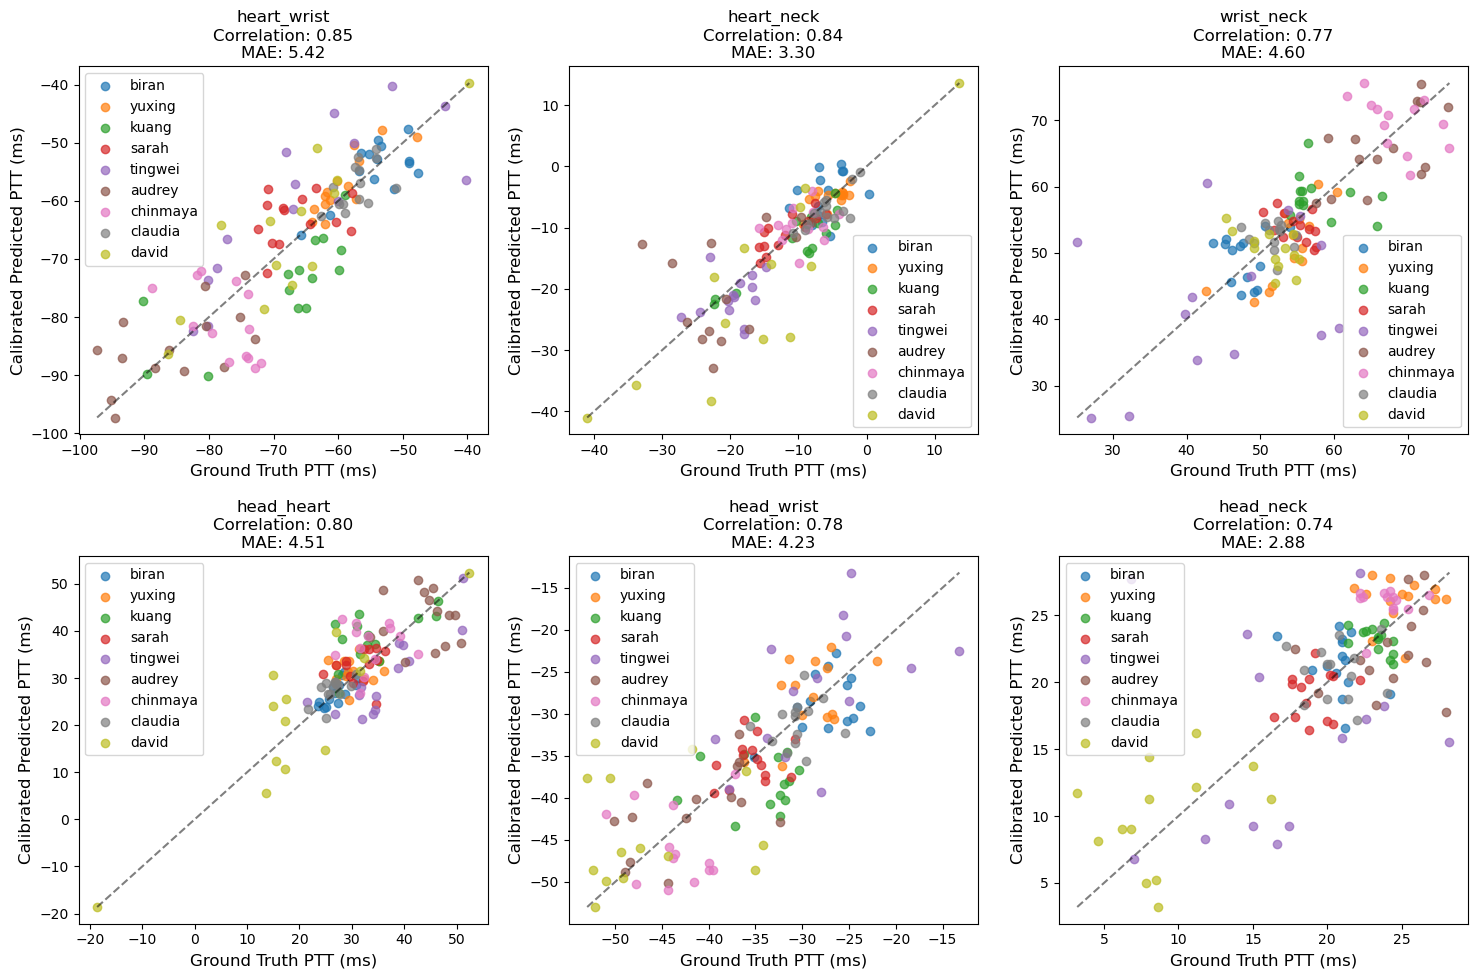

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
userlist = ['biran', 'yuxing', 'kuang', 'sarah', 'tingwei', 'audrey', 'chinmaya', 'claudia', 'david']
filelist = [f'{user}_ptt_bp_data.csv' for user in userlist]
site_pairs = [
    'heart_wrist', 
    'heart_neck', 
    'wrist_neck', 
    'head_heart', 
    'head_wrist', 
    'head_neck'
]
# calibrate_sample = 4

# Create a figure with subplots for each site pair
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
plt.rcParams.update({'font.size': 14})

for i, site_pair in enumerate(site_pairs):
    all_normalized_data = []
    
    for file in filelist:
        # Read data for each user
        df = pd.read_csv(f'results/bp_eval/fusion_v3/{file}')
        
        # Get PTT column names
        gt_col = f'ptt_{site_pair}_gt'
        pred_col = f'ptt_{site_pair}_pred'
        
        gt_max = df[gt_col].max()
        gt_min = df[gt_col].min()
        pred_max = df[pred_col].max()
        pred_min = df[pred_col].min()
        pred_calibrated = (df[pred_col] - pred_min) / (pred_max - pred_min) * (gt_max - gt_min) + gt_min

        # # Prepare data
        # data_indices = np.arange(len(df))
        # np.random.shuffle(data_indices)
        
        # # Split into k folds
        # k = len(df) // calibrate_sample
        # fold_size = calibrate_sample
        
        # # Initialize array for calibrated predictions
        # pred_calibrated = np.zeros(len(df))
        
        # # Do k-fold cross validation
        # for fold in range(k):
        #     # Get indices for this fold
        #     start_idx = fold * fold_size
        #     end_idx = start_idx + fold_size
        #     if fold == k-1:
        #         end_idx = len(df)
                
        #     test_indices = data_indices[start_idx:end_idx]
        #     train_indices = np.array([i for i in data_indices if i not in test_indices])
            
        #     # Get train/test data
        #     train_gt = df[gt_col].iloc[train_indices].values.reshape(-1, 1)
        #     train_pred = df[pred_col].iloc[train_indices].values.reshape(-1, 1)
        #     test_pred = df[pred_col].iloc[test_indices].values.reshape(-1, 1)
            
        #     # Fit model on training data
        #     lr = LinearRegression()
        #     lr.fit(train_pred, train_gt)
            
        #     # Apply calibration to test data
        #     pred_calibrated[test_indices] = test_pred.flatten() * lr.coef_[0][0] + lr.intercept_[0]

        # Plot scatter for this user
        axes[i].scatter(df[gt_col], pred_calibrated, alpha=0.7, label=file.split('_')[0])
        
        # Store calibrated data for correlation calculation
        all_normalized_data.append(pd.DataFrame({
            'gt': df[gt_col],
            'pred': pred_calibrated
        }))
    
    # Calculate correlation and MAE using all calibrated data points
    all_data = pd.concat(all_normalized_data)
    corr = np.corrcoef(all_data['gt'], all_data['pred'])[0,1]
    mae = mean_absolute_error(all_data['gt'], all_data['pred'])
    # mae = mae / (all_data['gt'].max() - all_data['gt'].min())
    
    axes[i].set_title(f'{site_pair}\nCorrelation: {corr:.2f}\nMAE: {mae:.2f}', fontsize=12)
    axes[i].set_xlabel('Ground Truth PTT (ms)', fontsize=12)
    axes[i].set_ylabel('Calibrated Predicted PTT (ms)', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].legend(fontsize=10)
    
    # Add diagonal line
    min_val = min(all_data['gt'].min(), all_data['pred'].min())
    max_val = max(all_data['gt'].max(), all_data['pred'].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)

plt.tight_layout()
plt.show()

In [53]:
# Create a DataFrame to store correlations
import pandas as pd
import numpy as np

userlist = ['biran', 'yuxing', 'kuang', 'sarah', 'shellie', 'tingwei', 'audrey', 'chinmaya', 'claudia', 'hongyang', 'david', 'sean', 'bill']
site_pairs = [
    'heart_wrist', 
    'heart_neck', 
    'wrist_neck', 
    'head_heart', 
    'head_wrist', 
    'head_neck'
]

# Initialize empty DataFrame
correlations = pd.DataFrame(index=site_pairs, columns=userlist)
corrs_sys = pd.DataFrame(index=site_pairs, columns=userlist)
corrs_dia = pd.DataFrame(index=site_pairs, columns=userlist)
# Calculate correlations for each user and site pair
for user in userlist:
    # Read data for user
    df = pd.read_csv(f'results/bp_eval/fusion_v3/{user}_ptt_bp_data.csv')
    
    for site_pair in site_pairs:
        # Get PTT column names
        gt_col = f'ptt_{site_pair}_gt'
        pred_col = f'ptt_{site_pair}_pred'
        
        # Calculate correlation
        corr = np.corrcoef(df[gt_col], df[pred_col])[0,1]
        correlations.loc[site_pair, user] = corr
        corrs_sys.loc[site_pair, user] = np.corrcoef(df['sys'], df[gt_col])[0,1]
        corrs_dia.loc[site_pair, user] = np.corrcoef(df['dia'], df[gt_col])[0,1]

# sum_corr = correlations.abs().sum(axis=1)
# sum_corr_sys = corrs_sys.abs().sum(axis=1)  
# sum_corr_dia = corrs_dia.abs().sum(axis=1)
# print(sum_corr)
# print(sum_corr_sys)
# print(sum_corr_dia)

# Display the correlation table
print(correlations.round(2))
# save the correlation table as a csv file
# correlations.to_csv('results/bp_eval/fusion_v3/gt_pred_corr.csv')


                biran    yuxing     kuang     sarah   shellie   tingwei  \
heart_wrist   0.67601  0.850236   0.75581  0.277874  0.088358  0.811189   
heart_neck   0.325054  0.610672  0.914367  0.820712 -0.005773  0.235941   
wrist_neck   0.052028   0.76958 -0.271768 -0.526013  0.087792  0.357542   
head_heart   0.756636  -0.03227   0.59394  0.201119 -0.039886  0.852307   
head_wrist   0.316434  0.511635   0.02555  0.234629  0.395234  0.547288   
head_neck   -0.343192 -0.000673 -0.552439  0.188381 -0.174368   0.16728   

               audrey  chinmaya   claudia  hongyang     david      sean  \
heart_wrist  0.581526 -0.590561  0.526277 -0.155364  0.849788  0.345435   
heart_neck   0.427956   0.20199  0.748598  0.551685   0.86547  0.019818   
wrist_neck    0.61752 -0.485649 -0.116967 -0.279819 -0.621396  0.368782   
head_heart  -0.031807  0.042091  0.621616  0.107127  0.895062  0.232333   
head_wrist   0.562935 -0.071741   0.15946  -0.50065  0.221539  0.674079   
head_neck    0.257322  0

heart_wrist
Sys vs GT PTT
50th: 5.88, 75th: 11.34, 90th: 16.04
heart_wrist
Sys vs Radar PTT
50th: 7.47, 75th: 14.75, 90th: 20.49
heart_wrist
Dia vs GT PTT
50th: 2.69, 75th: 4.18, 90th: 5.73
heart_wrist
Dia vs Radar PTT
50th: 3.92, 75th: 6.09, 90th: 7.43
heart_neck
Sys vs GT PTT
50th: 5.52, 75th: 11.10, 90th: 15.01
heart_neck
Sys vs Radar PTT
50th: 7.45, 75th: 13.96, 90th: 18.69
heart_neck
Dia vs GT PTT
50th: 2.69, 75th: 4.40, 90th: 5.86
heart_neck
Dia vs Radar PTT
50th: 3.73, 75th: 6.41, 90th: 8.68


/tmp/ipykernel_3231969/454172547.py:166: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_3231969/454172547.py:166: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


wrist_neck
Sys vs GT PTT
50th: 7.97, 75th: 14.20, 90th: 19.81
wrist_neck
Sys vs Radar PTT
50th: 7.72, 75th: 15.43, 90th: 20.71
wrist_neck
Dia vs GT PTT
50th: 2.56, 75th: 4.70, 90th: 6.64
wrist_neck
Dia vs Radar PTT
50th: 3.28, 75th: 6.54, 90th: 8.34


/tmp/ipykernel_3231969/454172547.py:166: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


head_heart
Sys vs GT PTT
50th: 6.70, 75th: 11.76, 90th: 16.51
head_heart
Sys vs Radar PTT
50th: 7.13, 75th: 12.86, 90th: 19.46
head_heart
Dia vs GT PTT
50th: 2.78, 75th: 4.25, 90th: 5.89
head_heart
Dia vs Radar PTT
50th: 3.97, 75th: 6.18, 90th: 7.75


/tmp/ipykernel_3231969/454172547.py:166: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


head_wrist
Sys vs GT PTT
50th: 7.19, 75th: 14.60, 90th: 18.58
head_wrist
Sys vs Radar PTT
50th: 7.47, 75th: 14.11, 90th: 20.82
head_wrist
Dia vs GT PTT
50th: 2.60, 75th: 4.58, 90th: 6.02
head_wrist
Dia vs Radar PTT
50th: 3.35, 75th: 6.18, 90th: 8.69


/tmp/ipykernel_3231969/454172547.py:166: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


head_neck
Sys vs GT PTT
50th: 7.32, 75th: 14.25, 90th: 20.78
head_neck
Sys vs Radar PTT
50th: 7.23, 75th: 13.84, 90th: 22.16
head_neck
Dia vs GT PTT
50th: 2.79, 75th: 4.48, 90th: 6.05
head_neck
Dia vs Radar PTT
50th: 4.12, 75th: 5.98, 90th: 7.92


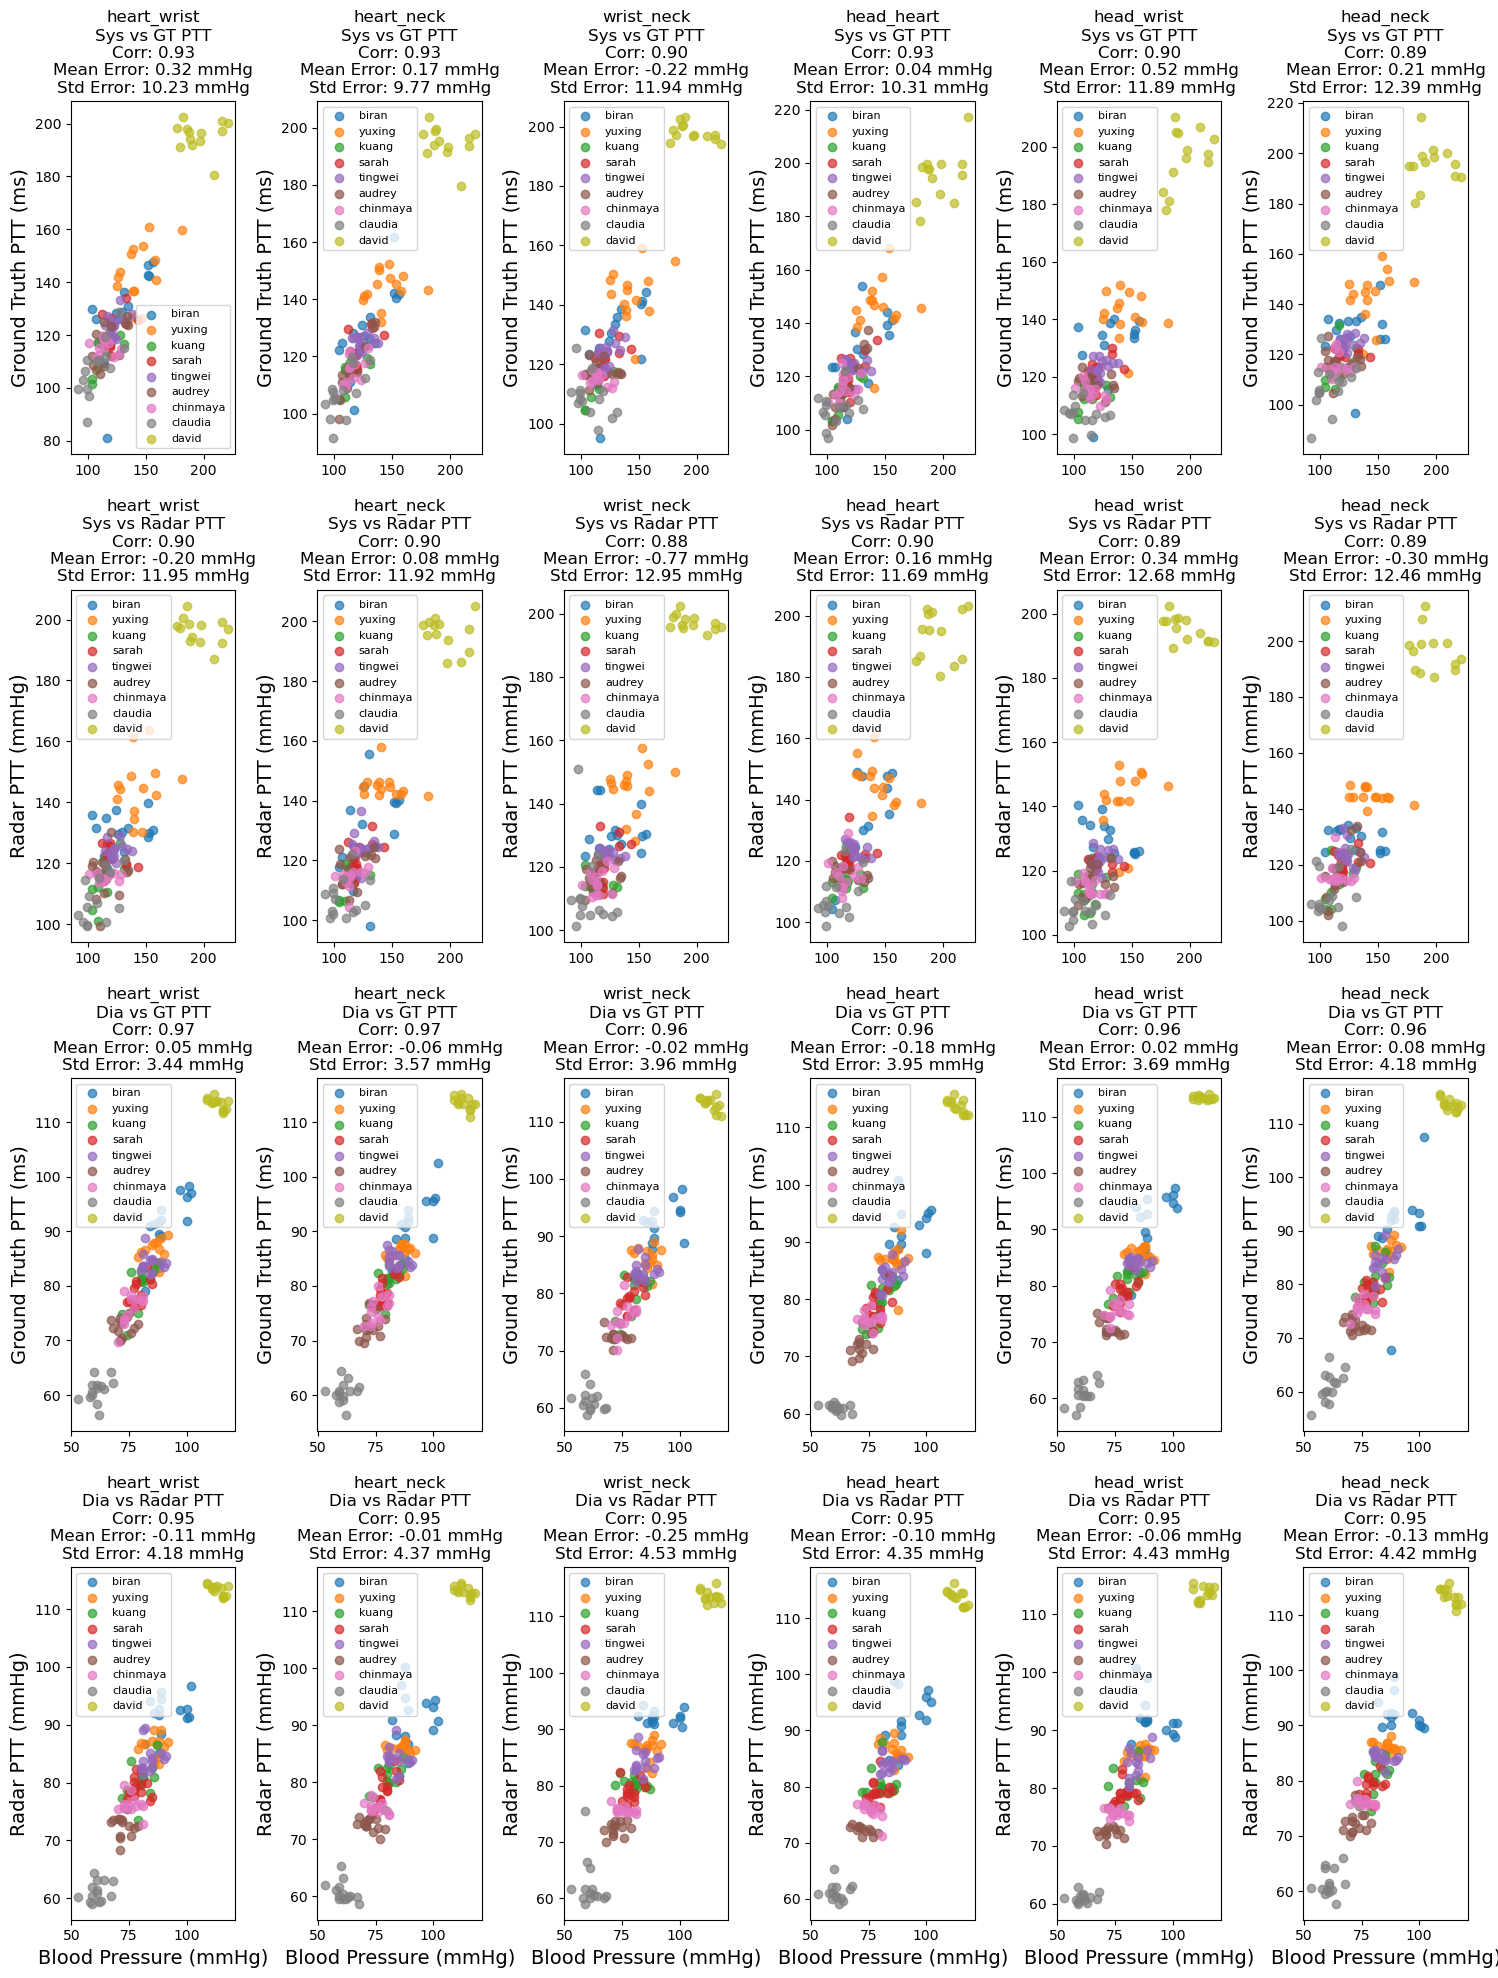

In [60]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
userlist = ['biran', 'yuxing', 'kuang', 'sarah', 'tingwei', 'audrey', 'chinmaya', 'claudia', 'david']
filelist = [f'{user}_ptt_bp_data.csv' for user in userlist]
site_pairs = [
    'heart_wrist', 
    'heart_neck', 
    'wrist_neck', 
    'head_heart', 
    'head_wrist', 
    'head_neck'
]
calibrate_sample = 3

# Create a figure with subplots for each site pair, separate rows for sys and dia
fig, axes = plt.subplots(4, len(site_pairs), figsize=(15, 20))  # 4 rows: sys_gt, sys_pred, dia_gt, dia_pred
plt.rcParams.update({'font.size': 14})

# Define the BP-PTT relationship function: BP = k1/(PTT-k2)^2 + k3
def bp_ptt_func(ptt, k1, k2, k3):
    return k1/((ptt-k2)**2) + k3
init_params = [1, 0.1, 100]
bounds = ([0,0,40], [100,0.5,200])
for i, site_pair in enumerate(site_pairs):
    all_normalized_data = []
    
    for file in filelist:
        # Read data for each user
        df = pd.read_csv(f'results/bp_eval/fusion_v3/{file}')
        
        # Get PTT column names
        gt_col = f'ptt_{site_pair}_gt'
        pred_col = f'ptt_{site_pair}_pred'
        
        # Prepare data
        data_indices = np.arange(len(df))
        np.random.shuffle(data_indices)
        
        # Initialize arrays for calibrated predictions
        sys_calibrated_pred = np.zeros(len(df))
        dia_calibrated_pred = np.zeros(len(df))
        sys_calibrated_gt = np.zeros(len(df))
        dia_calibrated_gt = np.zeros(len(df))

        # fit a linear model to the data
        train_sys = df['sys'].values
        train_pred = df[pred_col].values
        test_pred = df[pred_col].values
        train_gt = df[gt_col].values
        test_gt = df[gt_col].values
        
        # # Fit model for systolic using curve_fit instead of LinearRegression
        # lr_sys_pred = LinearRegression()
        # lr_sys_pred.fit(train_pred.reshape(-1, 1), train_sys.reshape(-1, 1))
        # lr_sys_gt = LinearRegression()
        # lr_sys_gt.fit(train_gt.reshape(-1, 1), train_sys.reshape(-1, 1))
        # sys_calibrated_pred = test_pred.flatten() * lr_sys_pred.coef_[0][0] + lr_sys_pred.intercept_[0]
        # sys_calibrated_gt = test_gt.flatten() * lr_sys_gt.coef_[0][0] + lr_sys_gt.intercept_[0]
        
        # train_dia = df['dia'].values
        # lr_dia_pred = LinearRegression()
        # lr_dia_pred.fit(train_pred.reshape(-1, 1), train_dia.reshape(-1, 1))
        # lr_dia_gt = LinearRegression()
        # lr_dia_gt.fit(train_gt.reshape(-1, 1), train_dia.reshape(-1, 1))
        # dia_calibrated_pred = test_pred.flatten() * lr_dia_pred.coef_[0][0] + lr_dia_pred.intercept_[0]
        # dia_calibrated_gt = test_gt.flatten() * lr_dia_gt.coef_[0][0] + lr_dia_gt.intercept_[0]
        
        
        
        # Split into k folds
        k = len(df) // calibrate_sample
        fold_size = calibrate_sample
        # Do k-fold cross validation
        for fold in range(k):
            # Get indices for this fold
            start_idx = fold * fold_size
            end_idx = start_idx + fold_size
            if fold == k-1:
                end_idx = len(df)
                
            test_indices = data_indices[start_idx:end_idx]
            train_indices = np.array([i for i in data_indices if i not in test_indices])
            
            # Get train/test data for systolic
            train_sys = df['sys'].iloc[train_indices].values
            train_pred = df[pred_col].iloc[train_indices].values
            test_pred = df[pred_col].iloc[test_indices].values
            train_gt = df[gt_col].iloc[train_indices].values
            test_gt = df[gt_col].iloc[test_indices].values
            
            # Fit model for systolic using curve_fit instead of LinearRegression
            # Previous linear model:
            lr_sys_pred = LinearRegression()
            lr_sys_pred.fit(train_pred.reshape(-1, 1), train_sys.reshape(-1, 1))
            lr_sys_gt = LinearRegression()
            lr_sys_gt.fit(train_gt.reshape(-1, 1), train_sys.reshape(-1, 1))
            sys_calibrated_pred[test_indices] = test_pred.flatten() * lr_sys_pred.coef_[0][0] + lr_sys_pred.intercept_[0]
            sys_calibrated_gt[test_indices] = test_gt.flatten() * lr_sys_gt.coef_[0][0] + lr_sys_gt.intercept_[0]

            # popt_sys_pred, _ = curve_fit(bp_ptt_func, train_pred, train_sys, p0=init_params, bounds=bounds, maxfev=100000, method='trf')
            # popt_sys_gt, _ = curve_fit(bp_ptt_func, train_gt, train_sys, p0=init_params, bounds=bounds, maxfev=100000, method='trf')
            # sys_calibrated_pred[test_indices] = bp_ptt_func(test_pred, *popt_sys_pred)
            # sys_calibrated_gt[test_indices] = bp_ptt_func(test_gt, *popt_sys_gt)
            
            # Get train/test data for diastolic
            train_dia = df['dia'].iloc[train_indices].values
            
            # Fit model for diastolic
            # Previous linear model:
            lr_dia_pred = LinearRegression()
            lr_dia_pred.fit(train_pred.reshape(-1, 1), train_dia.reshape(-1, 1))
            lr_dia_gt = LinearRegression()
            lr_dia_gt.fit(train_gt.reshape(-1, 1), train_dia.reshape(-1, 1))
            dia_calibrated_pred[test_indices] = test_pred.flatten() * lr_dia_pred.coef_[0][0] + lr_dia_pred.intercept_[0]
            dia_calibrated_gt[test_indices] = test_gt.flatten() * lr_dia_gt.coef_[0][0] + lr_dia_gt.intercept_[0]

            # popt_dia_pred, _ = curve_fit(bp_ptt_func, train_pred, train_dia, p0=init_params, bounds=bounds, maxfev=100000, method='trf')
            # popt_dia_gt, _ = curve_fit(bp_ptt_func, train_gt, train_dia, p0=init_params, bounds=bounds, maxfev=100000, method='trf')
            # dia_calibrated_pred[test_indices] = bp_ptt_func(test_pred, *popt_dia_pred)
            # dia_calibrated_gt[test_indices] = bp_ptt_func(test_gt, *popt_dia_gt)
        
        # Plot scatter for this user
        # Systolic
        axes[0,i].scatter(df['sys'], sys_calibrated_gt, alpha=0.7, label=file.split('_')[0])
        axes[1,i].scatter(df['sys'], sys_calibrated_pred, alpha=0.7, label=file.split('_')[0])
        
        # Diastolic
        axes[2,i].scatter(df['dia'], dia_calibrated_gt, alpha=0.7, label=file.split('_')[0])
        axes[3,i].scatter(df['dia'], dia_calibrated_pred, alpha=0.7, label=file.split('_')[0])
        
        # Store calibrated data for correlation calculation
        all_normalized_data.append(pd.DataFrame({
            'sys': df['sys'],
            'dia': df['dia'],
            'sys_cal_pred': sys_calibrated_pred,
            'sys_cal_gt': sys_calibrated_gt,
            'dia_cal_pred': dia_calibrated_pred,
            'dia_cal_gt': dia_calibrated_gt
        }))
    
    # Calculate correlations using all calibrated data points
    all_data = pd.concat(all_normalized_data)
    sys_gt_corr = np.corrcoef(all_data['sys'], all_data['sys_cal_gt'])[0,1]
    sys_gt_error = all_data['sys'] - all_data['sys_cal_gt']
    sys_pred_corr = np.corrcoef(all_data['sys'], all_data['sys_cal_pred'])[0,1]
    sys_pred_error = all_data['sys'] - all_data['sys_cal_pred']
    dia_gt_corr = np.corrcoef(all_data['dia'], all_data['dia_cal_gt'])[0,1]
    dia_gt_error = all_data['dia'] - all_data['dia_cal_gt']
    dia_pred_corr = np.corrcoef(all_data['dia'], all_data['dia_cal_pred'])[0,1]
    dia_pred_error = all_data['dia'] - all_data['dia_cal_pred']
    
    # Set titles and labels
    axes[0,i].set_title(f'{site_pair}\nSys vs GT PTT\nCorr: {sys_gt_corr:.2f}\nMean Error: {np.mean(sys_gt_error):.2f} mmHg\nStd Error: {np.std(sys_gt_error):.2f} mmHg', fontsize=12)
    # print the 50th, 75th, 90th percentile of sys_gt_error
    print(f'{site_pair}\nSys vs GT PTT\n50th: {np.percentile(np.abs(sys_gt_error), 50):.2f}, 75th: {np.percentile(np.abs(sys_gt_error), 75):.2f}, 90th: {np.percentile(np.abs(sys_gt_error), 90):.2f}')
    axes[1,i].set_title(f'{site_pair}\nSys vs Radar PTT\nCorr: {sys_pred_corr:.2f}\nMean Error: {np.mean(sys_pred_error):.2f} mmHg\nStd Error: {np.std(sys_pred_error):.2f} mmHg', fontsize=12)
    print(f'{site_pair}\nSys vs Radar PTT\n50th: {np.percentile(np.abs(sys_pred_error), 50):.2f}, 75th: {np.percentile(np.abs(sys_pred_error), 75):.2f}, 90th: {np.percentile(np.abs(sys_pred_error), 90):.2f}')
    axes[2,i].set_title(f'{site_pair}\nDia vs GT PTT\nCorr: {dia_gt_corr:.2f}\nMean Error: {np.mean(dia_gt_error):.2f} mmHg\nStd Error: {np.std(dia_gt_error):.2f} mmHg', fontsize=12)
    print(f'{site_pair}\nDia vs GT PTT\n50th: {np.percentile(np.abs(dia_gt_error), 50):.2f}, 75th: {np.percentile(np.abs(dia_gt_error), 75):.2f}, 90th: {np.percentile(np.abs(dia_gt_error), 90):.2f}')
    axes[3,i].set_title(f'{site_pair}\nDia vs Radar PTT\nCorr: {dia_pred_corr:.2f}\nMean Error: {np.mean(dia_pred_error):.2f} mmHg\nStd Error: {np.std(dia_pred_error):.2f} mmHg', fontsize=12)
    print(f'{site_pair}\nDia vs Radar PTT\n50th: {np.percentile(np.abs(dia_pred_error), 60):.2f}, 75th: {np.percentile(np.abs(dia_pred_error), 85):.2f}, 90th: {np.percentile(np.abs(dia_pred_error), 95):.2f}')
    
    for ax_row in axes:
        for ax in ax_row:
            ax.tick_params(axis='both', labelsize=10)
            ax.legend(fontsize=8)
    
    # Set common labels
    axes[0,i].set_ylabel('Ground Truth PTT (ms)')
    axes[1,i].set_ylabel('Radar PTT (mmHg)')
    axes[2,i].set_ylabel('Ground Truth PTT (ms)')
    axes[3,i].set_ylabel('Radar PTT (mmHg)')
    
    axes[3,i].set_xlabel('Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

In [88]:
[all_data['pred'].min(), all_data['pred'].max()],

([-235.05772514048192, 290.4041134825214],)

In [89]:
[all_data['gt'].min(), all_data['gt'].max()]

[25.2, 84.80000000000001]


biran_ptt_bp_data.csv - heart_wrist Results:
Ground Truth - Mean Systolic Error: 2.00 mmHg
Ground Truth - Median Systolic Error: 3.07 mmHg
Ground Truth - Mean Diastolic Error: 0.17 mmHg
Ground Truth - Median Diastolic Error: 0.67 mmHg
Predicted - Mean Systolic Error: 1.01 mmHg
Predicted - Median Systolic Error: 2.75 mmHg
Predicted - Mean Diastolic Error: 0.43 mmHg
Predicted - Median Diastolic Error: -0.28 mmHg

biran_ptt_bp_data.csv - heart_neck Results:
Ground Truth - Mean Systolic Error: 45.25 mmHg
Ground Truth - Median Systolic Error: 5.91 mmHg
Ground Truth - Mean Diastolic Error: 14.97 mmHg
Ground Truth - Median Diastolic Error: -1.56 mmHg
Predicted - Mean Systolic Error: 0.40 mmHg
Predicted - Median Systolic Error: -4.90 mmHg
Predicted - Mean Diastolic Error: 0.03 mmHg
Predicted - Median Diastolic Error: -1.85 mmHg

biran_ptt_bp_data.csv - wrist_neck Results:
Ground Truth - Mean Systolic Error: 2.38 mmHg
Ground Truth - Median Systolic Error: 0.06 mmHg
Ground Truth - Mean Diastoli

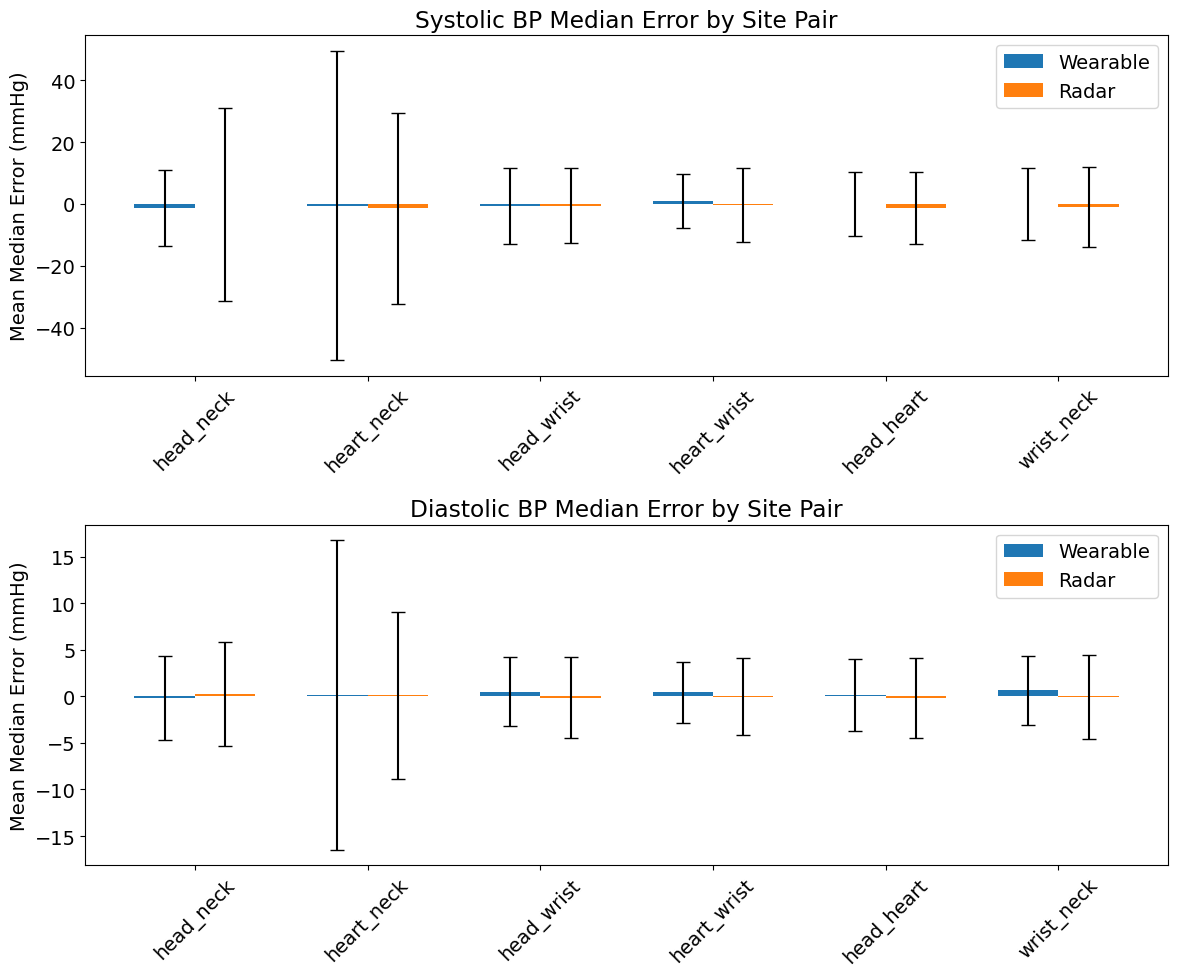

In [162]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

userlist = ['biran', 'yuxing', 'kuang', 'sarah', 'shellie', 'tingwei', 'yuxing', 'audrey', 'chinmaya', 'claudia', 'hongyang']
filelist = [f'{user}_ptt_bp_data.csv' for user in userlist]
site_pairs = [
    'heart_wrist', 
    'heart_neck', 
    'wrist_neck', 
    'head_heart', 
    'head_wrist', 
    'head_neck'
]
calibrate_sample = 3

all_sys_errors_gt = []
all_dia_errors_gt = []
all_sys_errors_pred = []
all_dia_errors_pred = []
site_results = []

for file in filelist:
    df = pd.read_csv(f'results/bp_eval/fusion_v3/{file}')
    
    for i, site_pair in enumerate(site_pairs):
        # Get PTT column names
        gt_col = f'ptt_{site_pair}_gt'
        pred_col = f'ptt_{site_pair}_pred'
        gt_ptt = 1/df[gt_col]
        pred_ptt = 1/df[pred_col]
        
        data = pd.DataFrame({
            'sys': df['sys'],
            'dia': df['dia'],
            'gt_ptt': gt_ptt,
            'pred_ptt': pred_ptt
        })
        
        # Shuffle the data
        data = data.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # Initialize arrays to store errors
        sys_errors_gt = []
        dia_errors_gt = []
        sys_errors_pred = []
        dia_errors_pred = []
        
        # Perform k-fold cross validation
        fold_size = len(data) // k
        for fold in range(k):
            # Split data into train and test
            test_start = fold * fold_size
            test_end = (fold + 1) * fold_size if fold < k - 1 else len(data)
            test_data = data.iloc[test_start:test_end]
            train_data = pd.concat([data.iloc[:test_start], data.iloc[test_end:]])
            
            # Train linear models for ground truth PTT
            sys_model_gt = LinearRegression()
            dia_model_gt = LinearRegression()
            sys_model_gt.fit(train_data[['gt_ptt']], train_data['sys'])
            dia_model_gt.fit(train_data[['gt_ptt']], train_data['dia'])
            
            # Train linear models for predicted PTT
            sys_model_pred = LinearRegression()
            dia_model_pred = LinearRegression()
            sys_model_pred.fit(train_data[['pred_ptt']], train_data['sys'])
            dia_model_pred.fit(train_data[['pred_ptt']], train_data['dia'])
            
            # Calculate errors on test set
            # sys_errors_gt.extend(abs(test_data['sys'] - sys_model_gt.predict(test_data[['gt_ptt']])))
            # dia_errors_gt.extend(abs(test_data['dia'] - dia_model_gt.predict(test_data[['gt_ptt']])))
            # sys_errors_pred.extend(abs(test_data['sys'] - sys_model_pred.predict(test_data[['pred_ptt']])))
            # dia_errors_pred.extend(abs(test_data['dia'] - dia_model_pred.predict(test_data[['pred_ptt']])))
            
            # no absolute value
            sys_errors_gt.extend(test_data['sys'] - sys_model_gt.predict(test_data[['gt_ptt']]))
            dia_errors_gt.extend(test_data['dia'] - dia_model_gt.predict(test_data[['gt_ptt']]))
            sys_errors_pred.extend(test_data['sys'] - sys_model_pred.predict(test_data[['pred_ptt']]))
            dia_errors_pred.extend(test_data['dia'] - dia_model_pred.predict(test_data[['pred_ptt']]))
        
        # Add errors to overall lists
        all_sys_errors_gt.extend(sys_errors_gt)
        all_dia_errors_gt.extend(dia_errors_gt)
        all_sys_errors_pred.extend(sys_errors_pred)
        all_dia_errors_pred.extend(dia_errors_pred)
        
        print(f"\n{file} - {site_pair} Results:")
        print(f"Ground Truth - Mean Systolic Error: {np.mean(sys_errors_gt):.2f} mmHg")
        print(f"Ground Truth - Median Systolic Error: {np.median(sys_errors_gt):.2f} mmHg")
        print(f"Ground Truth - Mean Diastolic Error: {np.mean(dia_errors_gt):.2f} mmHg")
        print(f"Ground Truth - Median Diastolic Error: {np.median(dia_errors_gt):.2f} mmHg")
        print(f"Predicted - Mean Systolic Error: {np.mean(sys_errors_pred):.2f} mmHg")
        print(f"Predicted - Median Systolic Error: {np.median(sys_errors_pred):.2f} mmHg")
        print(f"Predicted - Mean Diastolic Error: {np.mean(dia_errors_pred):.2f} mmHg")
        print(f"Predicted - Median Diastolic Error: {np.median(dia_errors_pred):.2f} mmHg")
        
        # Store results for plotting
        site_results.append({
            'file': file,
            'site': site_pair,
            'sys_gt_med': sys_errors_gt,
            'dia_gt_med': dia_errors_gt,
            'sys_pred_med': sys_errors_pred,
            'dia_pred_med': dia_errors_pred
        })

print("\nOverall Results (across all files and sites):")
print(f"Ground Truth - Mean Systolic Error: {np.mean(all_sys_errors_gt):.2f} mmHg")
print(f"Ground Truth - Median Systolic Error: {np.median(all_sys_errors_gt):.2f} mmHg")
print(f"Ground Truth - Mean Diastolic Error: {np.mean(all_dia_errors_gt):.2f} mmHg")
print(f"Ground Truth - Median Diastolic Error: {np.median(all_dia_errors_gt):.2f} mmHg")
print(f"Predicted - Mean Systolic Error: {np.mean(all_sys_errors_pred):.2f} mmHg")
print(f"Predicted - Median Systolic Error: {np.median(all_sys_errors_pred):.2f} mmHg")
print(f"Predicted - Mean Diastolic Error: {np.mean(all_dia_errors_pred):.2f} mmHg")
print(f"Predicted - Median Diastolic Error: {np.median(all_dia_errors_pred):.2f} mmHg")

# Create bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Group results by site pair
sites = list(set([r['site'] for r in site_results]))
files = list(set([r['file'] for r in site_results]))
x = np.arange(len(sites))
width = 0.35

# Calculate averages and std across files for each site
sys_gt = []
sys_pred = []
dia_gt = []
dia_pred = []
sys_gt_std = []
sys_pred_std = []
dia_gt_std = []
dia_pred_std = []

for site in sites:
    site_data = [r for r in site_results if r['site'] == site]
    sys_gt_all = np.concatenate([r['sys_gt_med'] for r in site_data])
    sys_pred_all = np.concatenate([r['sys_pred_med'] for r in site_data])
    dia_gt_all = np.concatenate([r['dia_gt_med'] for r in site_data])
    dia_pred_all = np.concatenate([r['dia_pred_med'] for r in site_data])
    
    sys_gt.append(np.median(sys_gt_all))
    sys_pred.append(np.median(sys_pred_all))
    dia_gt.append(np.median(dia_gt_all))
    dia_pred.append(np.median(dia_pred_all))
    
    sys_gt_std.append(np.std(sys_gt_all))
    sys_pred_std.append(np.std(sys_pred_all))
    dia_gt_std.append(np.std(dia_gt_all))
    dia_pred_std.append(np.std(dia_pred_all))
    
    print(f"{site}:")
    print(f"sys_gt_all: 50th: {np.percentile(sys_gt_all, 50):.2f}, 75th: {np.percentile(sys_gt_all, 75):.2f}, 90th: {np.percentile(sys_gt_all, 90):.2f}")
    print(f"sys_pred_all: 50th: {np.percentile(sys_pred_all, 50):.2f}, 75th: {np.percentile(sys_pred_all, 75):.2f}, 90th: {np.percentile(sys_pred_all, 90):.2f}")
    print(f"dia_gt_all: 50th: {np.percentile(dia_gt_all, 50):.2f}, 75th: {np.percentile(dia_gt_all, 75):.2f}, 90th: {np.percentile(dia_gt_all, 90):.2f}")
    print(f"dia_pred_all: 50th: {np.percentile(dia_pred_all, 50):.2f}, 75th: {np.percentile(dia_pred_all, 75):.2f}, 90th: {np.percentile(dia_pred_all, 90):.2f}")

# Systolic plot
ax1.bar(x - width/2, sys_gt, width, yerr=sys_gt_std, capsize=5, label='Wearable')
ax1.bar(x + width/2, sys_pred, width, yerr=sys_pred_std, capsize=5, label='Radar')
ax1.set_ylabel('Mean Median Error (mmHg)')
ax1.set_title('Systolic BP Median Error by Site Pair')
ax1.set_xticks(x)
ax1.set_xticklabels(sites, rotation=45)
ax1.legend()

# Diastolic plot
ax2.bar(x - width/2, dia_gt, width, yerr=dia_gt_std, capsize=5, label='Wearable')
ax2.bar(x + width/2, dia_pred, width, yerr=dia_pred_std, capsize=5, label='Radar')
ax2.set_ylabel('Mean Median Error (mmHg)')
ax2.set_title('Diastolic BP Median Error by Site Pair')
ax2.set_xticks(x)
ax2.set_xticklabels(sites, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
np.mean(np.concatenate([r['sys_gt_med'] for r in site_results]))

9.14874471733583

In [11]:
np.concatenate([r['sys_gt_med'] for r in site_results]).shape

(280,)

In [ ]:
[r['sys_gt_med'] for r in site_data]